In [5]:
# import the required software libraries
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt

In [6]:
# https://stackoverflow.com/questions/27896214/reading-tab-delimited-file-with-pandas-works-on-windows-but-not-on-mac
# https://doi.pangaea.de/10.1594/PANGAEA.55505
temp = pd.read_csv('https://doi.pangaea.de/10.1594/PANGAEA.683655?format=textfile', sep="\t", skiprows=20)

In [7]:
temp.rename(columns=({"Depth ice/snow [m]":"depth_ice_snow_m", "Age model [ka]":"age_model_ka", "δD [‰ SMOW]":"δd_‰_smow", "delta T [°C]":"delta_t_c", "Sample ID":"sample_id"}), inplace=True)

In [8]:
temp.head()

,depth_ice_snow_m,age_model_ka,δd_‰_smow,delta_t_c,sample_id
0,0.00,-0.050,NaN,NaN,1
1,0.55,-0.044,NaN,NaN,2
2,1.10,-0.037,NaN,NaN,3
3,1.65,-0.032,NaN,NaN,4
4,2.20,-0.025,NaN,NaN,5


In [9]:
temp['year'] = 1950-(temp['age_model_ka']*1000)

In [10]:
temp.head(5)

,depth_ice_snow_m,age_model_ka,δd_‰_smow,delta_t_c,sample_id,year
0,0.00,-0.050,NaN,NaN,1,2000.0
1,0.55,-0.044,NaN,NaN,2,1994.0
2,1.10,-0.037,NaN,NaN,3,1987.0
3,1.65,-0.032,NaN,NaN,4,1982.0
4,2.20,-0.025,NaN,NaN,5,1975.0


In [11]:
temp['years_before_present'] = 2023 - temp['year']

In [12]:
temp

,depth_ice_snow_m,age_model_ka,δd_‰_smow,delta_t_c,sample_id,year,years_before_present
0,0.00,-0.050,NaN,NaN,1,2000.0,23.0
1,0.55,-0.044,NaN,NaN,2,1994.0,29.0
2,1.10,-0.037,NaN,NaN,3,1987.0,36.0
3,1.65,-0.032,NaN,NaN,4,1982.0,41.0
4,2.20,-0.025,NaN,NaN,5,1975.0,48.0
...,...,...,...,...,...,...,...
5795,3187.25,797.408,-440.2,-8.73,5796,-795458.0,797481.0
5796,3187.80,798.443,-439.0,-8.54,5797,-796493.0,798516.0
5797,3188.35,799.501,-441.1,-8.88,5798,-797551.0,799574.0
5798,3188.90,800.589,-441.4,-8.92,5799,-798639.0,800662.0


In [ ]:
temp.to_excel('temp.xlsx')

In [14]:
y_temp = temp.sort_values(by='years_before_present', ascending=True, inplace=True)

In [15]:
print(y_temp)

None


<function matplotlib.pyplot.show(close=None, block=None)>

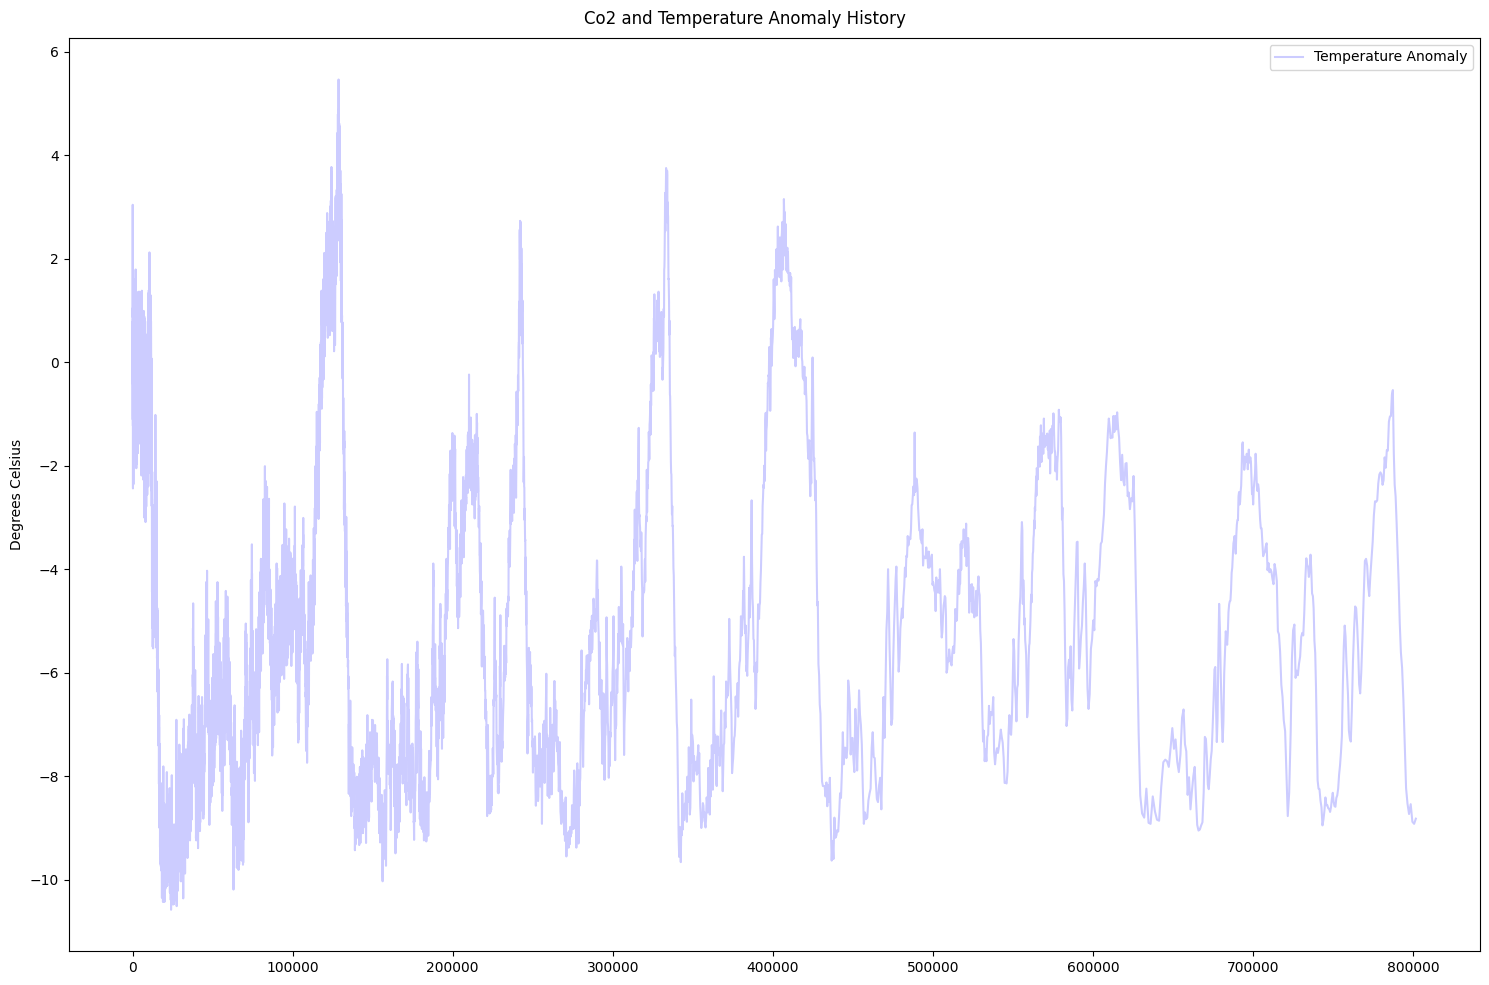

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(temp['years_before_present'], temp['delta_t_c'], color='blue', alpha=0.2, label='Temperature Anomaly')
ax.legend(loc=1)
ax.set_ylabel('Degrees Celsius')

plt.suptitle('Co2 and Temperature Anomaly History')
fig.tight_layout()
plt.show

